In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号  
# import tikzplotlib

my_dict = {'s': 1, 'ms': 1e3, 'μs': 1e6 ,'ns':1e9}
# print(my_dict)
plt.rcParams.update({'axes.labelsize': 16,'xtick.labelsize': 14, 'ytick.labelsize': 14,'legend.fontsize': 12})

def mydraw2(filename,title='Waveforms on the oscilloscope',label1='CH1',label2='CH2',x_label='时间',y_label='电压/V',xrange=(),yrange=((),()),time_unit='s',save=''):
    if time_unit=='us':
        time_unit='μs'
    df = pd.read_csv(filename)
    # 提取X轴和Y轴数据
    x_data = df.iloc[1:, 0].to_numpy(dtype=float)
    ch1_data = df.iloc[1:, 1].to_numpy(dtype=float)
    ch2_data = df.iloc[1:, 2].to_numpy(dtype=float)

    dt=df['Increment'][0]
    delt=df['Start'][0]
    # print('delt',delt)
    x_data=x_data*dt+delt
    x_data*=my_dict[time_unit]

    # 创建两个子图
    plt.figure(figsize=(8,4))
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ylim1,ylim2=yrange
    # 在第一个子图中绘制第一条曲线
    ax1.plot(x_data, ch1_data, label=label1, color='red')
    # ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.grid(True)
    if len(ylim1)!=0:
        ymin,ymax=ylim1
        ax1.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
        # ax1.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    ax1.legend()

    # 在第二个子图中绘制第二条曲线
    ax2.plot(x_data, ch2_data, label=label2, color='blue')
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.grid(True)
    if len(ylim2)!=0:
        ymin,ymax=ylim2
        ax2.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
        # ax2.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    ax2.legend()
    plt.xlabel(x_label+'/'+time_unit)
    if len(xrange) != 0:
        xmin, xmax = xrange
        plt.xlim(xmin, xmax)

    # 设置标题
    plt.suptitle(title)#,fontsize=10)

    # 调整子图之间的垂直间距
    # plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.08)
    if save!='':
        plt.savefig(save,bbox_inches='tight')
    # tikzplotlib.save("test.tex")
    # 显示图表

    fig.align_ylabels([ax1, ax2])
    plt.show()

    return x_data,ch1_data,ch2_data,time_unit

def mydraw(filename, title='Waveform on the oscilloscope', label='CH1', x_label='Time', y_label='Voltage (V)',xrange=(), yrange=(), time_unit='s', save=''):
    if time_unit == 'us':
        time_unit = 'μs'
    
    df = pd.read_csv(filename)

    # 提取X轴和Y轴数据
    x_data = df.iloc[1:, 0].to_numpy(dtype=float)
    ch1_data = df.iloc[1:, 1].to_numpy(dtype=float)

    dt = df['Increment'][0]
    delt = df['Start'][0]

    x_data = x_data * dt + delt
    x_data *= my_dict[time_unit]

    # 创建一个图形
    plt.figure(figsize=(8, 4))

    # 绘制CH1的数据
    plt.plot(x_data, ch1_data, label=label, color='red')

    plt.xlabel(f'{x_label}/{time_unit}')
    plt.ylabel(y_label)
    plt.title(title)

    if len(xrange) != 0:
        xmin, xmax = xrange
        plt.xlim(xmin, xmax)
    if len(yrange) != 0:
        ymin, ymax = yrange
        plt.ylim(ymin, ymax)

    plt.grid(True)
    plt.legend()

    if save != '':
        plt.savefig(save, bbox_inches='tight')

    plt.show()

    return x_data, ch1_data, time_unit

In [7]:
import os
path='../pic' #创建图片文件
os.makedirs(path,exist_ok=True) 

# 获取当前目录下的所有文件
file_list = [f for f in os.listdir() if os.path.isfile(f)]

# 按文件的最后修改时间进行排序，从上到下依次是从早到晚
sorted_file_list = sorted(file_list, key=lambda x: os.path.getmtime(x))

# 打印所有文件名
for file_name in sorted_file_list:
    if file_name[-3:]=='csv':
        print(file_name)



1_1.csv
1_10ns.csv


<Figure size 800x400 with 0 Axes>

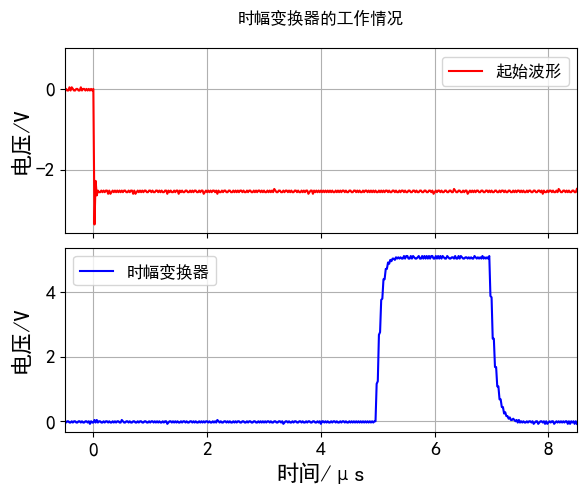

(array([-14.  , -13.98, -13.96, ...,  13.94,  13.96,  13.98]),
 array([-2.56, -2.52, -2.56, ...,  0.  , -0.04,  0.  ]),
 array([-0.04,  0.  , -0.04, ..., -0.04, -0.04,  0.  ]),
 'μs')

In [17]:
#序号1
save='gzqk.pdf'
# y1range=y2range=(-0.2,6.2)
xrange=(-0.5,8.5)
mydraw2('1_1.csv',title='时幅变换器的工作情况',label1='起始波形',label2='时幅变换器',time_unit='us',xrange=xrange,save=path+'/'+save)

<Figure size 800x400 with 0 Axes>

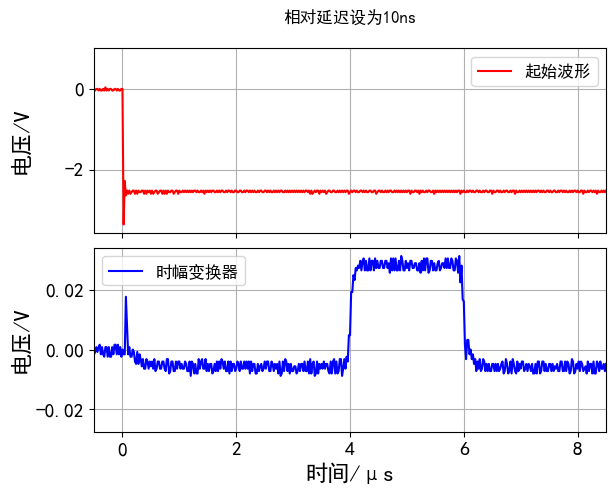

(array([-14.  , -13.98, -13.96, ...,  13.94,  13.96,  13.98]),
 array([-2.56, -2.52, -2.56, ...,  0.  , -0.04,  0.  ]),
 array([ 0.0192,  0.0256,  0.0192, ..., -0.004 , -0.0032,  0.    ]),
 'μs')

In [18]:
save='10ns.pdf'
xrange=(-0.5,8.5)
mydraw2('1_10ns.csv',title='相对延迟设为10ns',label1='起始波形',label2='时幅变换器',time_unit='us',xrange=xrange,save=path+'/'+save)

In [10]:
#序号1
save='../pic/ffh.pdf'
y1range=y2range=(-0.2,6.2)
mydraw2('2_ffh.csv',title='同相位无延迟输入的反符合输出',label1='输出I',label2='输出II',yrange=(y1range,y2range),time_unit='us',save=save)

FileNotFoundError: [Errno 2] No such file or directory: '2_ffh.csv'